# Data analysis - Introduction to Jupyter Notebooks for Nuclear Physics Laboratories

## Table of Content

 [About this Notebook](#about)

* [1.Jupyter and Python Basics](#basics)

    * [1.1 Before we start: Jupyter Basics](#jupyter)
    * [1.2 Python Basics and How Python Relates to Matlab](#matlab)
                                                       
    * [1.3 Importing python packages](#import)


* [2. Read experimental data from file](#read)
    * [2.1 Loading spectrum](#load)
    * [2.2 Plotting the data](#plot)


* [3. Analyzing the data](#fit)
    * [3.1 Fitting a Gaussian](#gaussian)
        * [3.1.1 Manually adjusting Gaussian parameters to fit a peak](#manually)
        * [3.1.1 Using python to fit a Gaussian for us ](#notmanual)
        * [3.1.3 Improving your fit - accounting for a linear background](#background)
    * [3.2 Calculate Peak Area](#peak_area)
    * [3.3 Fit a line - Energy calibration](#line)
        * [3.3.1 Find the coeficients](#coeff)
        * [3.3.2 Apply calibration](#application)
        
        
* [4. Take away](#away)

## About this Notebook <a name="about"></a>

The purpose of this _jupyter_ notebook is to introduce data analysis tools, strategies and terminology used in gamma spectroscopy. The example programming language is _Python3_ , but of course most other coding languages can do the job properly as well. 

If you have never programmed before or are new to Python and would like to learn more, there are many great Python tutorials available across the web.
There even exist plenty of _Open Online Courses_ , e.g.
https://www.coursera.org/learn/python. Please have a look around for the one
that you like the best. However, note that you do not need to be a
Python programmer to pass the lab: the tool and code you will find in this notebook are enough for you to perform your own data analysis!

The data analysis for these lab series can roughly be divided into four steps:
1. Read experimental data from file.
2. Identify peak positions.
3. Calibrate the detector response.
4. Perform a statistical analysis (e.g. error propagation) and present results.

A dedicated python library, i.e. a folder with already written code located in
`lib`, has been implemented for this data analysis connected to your labs. This library will support you in above mentioned steps 1-3. This introduction notebook will introduce you to these library functions as well as their working principle.

Each section will consist of full Python3 coding examples of how to perform the different steps of the data
analysis. Every example is finished with a template of how the
analysis library can be used to perform the same calculations.


# 1. Jupyter and Python Basics <a name="basics"></a>

## 1.1 Before we start: Jupyter Basics <a name="jupyter"></a>
- You can **edit** code and text cells by double clicking into them.
- You can **run** cells and thus execute code by marking a cell and clicking 'Run' or by pressing `Ctrl-Enter` on your keyboard.
- The **output** of the code is printed below cell and can consist of text, graphics or interative elements
- The code you run has **'side-effects'** such as **data being modified** or stored in variables. These are kept in memory and work between different cells as Python is running in the background as a so-called Jupyter 'kernel'.
- This means that you sometimes have to **consider the order** or the cells you run: later cells might require earlier to have been run or modify data in some way that could lead to surprising results if run twice.
- If you want, you can **add cells** from the `Insert` menu.
- **Should something not work as expected**:
  - Check the error message -- it should give you a good clue what is wrong and maybe that's all you need!
  - Make sure that you have run previous cells: they might contain code required for later cells!
  - Use 'undo' in the menu to revert to your previous change to the problematic cell (if you modified it at all).
  - Try restarting the Python kernel by selecting `Kernel-> Restart Kernel & Clear Output` from the menu. You will not lose any changes but your notebook will 'start over'. Simply execute the cells in order again and see whether the problem persists.

If you want to modify the code, you will be pleased to hear that Jupyter supports "tab-complete": if you start typing for example a variable name, you can hit the `Tab` key on your keyboard to let Jupyter complete the name for you and thus save a few keystrokes! Other useful hotkeys are explained in the `Help` menu items.

## 1.2 Python Basics and How Python Relates to Matlab <a name="matlab"></a>

This section will familiarize you with the basic syntax and some simple commands in Python.
Knowing this is not strictly necessary for the labs, but it will make it easier for you to read and modify the code or to look further into coding with Python:

In [ ]:
# this is a comment and will do nothing but help you understand the code.
# comments have a '#' before them.
# this is code to print something into the notebook:
print("Hello world!")

In [ ]:
# this defines a variable 'a' that holds a numeric value:
a = 4.92351231341613135
# if you write just the variable like this, Jupyter will print its value into the document next to an 'Out[]' marker:
a

Thare are different ways of printing the value of a variable into this document in a more informative way using the command `print`:

In [ ]:
# printing it 'raw' gives its value:
print("The variable 'a' is ", a)
# a more verbose option: formated printing:
# printing it formated allows to print only 3 digits after the comma
# which is defined by the format specifier ':.3f' where 'f' stands for 
# 'float number' and .3 gives the number of digits:
print("The variable 'a' is: {:.3f}".format(a))

In [ ]:
# doing arithmetics in the printout:
print("a^2 = {}".format(a*a))

Using lists and indices in Python: Python starts counting from `0`! And `-1` always refers to the *last* index in a list.

In [ ]:
# simple list can be defined as:
mylist = [1, 2, 3, 4, 5, 6, 7, 8, 9]
mylist

In [ ]:
#index in Python is always starting from 0
print("mylist at index 0 = {}".format(mylist[0]))
print("mylist at last index = {}".format(mylist[-1]))

In our labs, we often have to manipulate data stored in lists or numpy arrays (which have a very similar syntax).
You can select only part of a list by 'slicing' it at different index positions: `l[start_index:end_index:step size]`

In [ ]:
mylist[0:5:2]

In [ ]:
mylist[-1] = 10 # set index 8 to 10
mylist[0:5:2] = [99,99,99] # set above slice to 99 each: have to assign a list of same length!
mylist # output

## 1.3 Importing python libraries <a name="import"></a>

Here is **the full list of modules** needed to run the code in the Jupyter Notebook. 

In [1]:
# TODO : remove .py files from the repo that are not explicitly used here!
# Packages to access files in the system
import sys, os

# Package that supports mathmatical operations on arrays
import numpy as np  

# Package for plotting; 
# first line makes plots interactive, 
# second actually loads the library
%matplotlib notebook
import matplotlib.pyplot as plt

# Function that fits a curve to data 
from scipy.optimize import curve_fit

# Custom pakages prepared for you to analyze experimental data from labs.
# The code is located in the 'lib' subfolder which we have to specify:
sys.path.append('./lib')
import MCA, fittingFunctions, widgetsHelper

The very first line inserts the parent directory to the search path such that the analysis code in `fittingFunctions` and `MCA.py` can be found by `python`. You will likely need most of the above modules during the labs

The code below is only needed for the interactive demonstrations within this notebook, so please run it here as well:

In [4]:
# Package to create interactive plots
# Only needed in this demo!
from ipywidgets import interact, interactive, fixed, widgets, Button, Layout

# comment this line in if you prefer to use the full width of the display:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:100% !important; }</style>"))

--------------------------------------------------------------------------------------------------------------

# 2. Reading experimental data <a name="read"></a>

## 2.1 Loading a spectrum from file <a name="load"></a>

With the help of the function `load_spectrum` from package `MCA` one can read the experimental data from one data file as follows:

In [5]:
data = MCA.load_spectrum("Intro_data/test_data.Spe")

_If you are interested in how to read and write files in Python see e.g. http://www.pythonforbeginners.com/files/reading-and-writing-files-in-python or you could have a look at the source code in [MCA.py](./lib/MCA.py)._

`data` is an object of a class `Spectrum` in which we store information about our histogram: `bin_edges` and `bin_centers` variables give us information about our **channels** and `counts` is used to store  **counts** (cf. [MCA.py](./lib/MCA.py)). See for instance: 

In [ ]:
print('bin edges = ', data.bin_edges)
print('bin centers = ', data.bin_centers)
print('counts = ', data.counts)

## 2.2 Plotting the data <a name="plot"></a>

It is always good to visualise your data. This is how you can plot and visualise it:

In [ ]:
plt.figure()
# with the data read in with the first routine
plt.step(data.bin_centers, data.counts, where='mid')

plt.title("Test spectrum") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Counts")       # set label for y-axis 
#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.

What you have executed is actually an interactive plot. Try to move your mouse around the plot - you will notice that there are x and y values of the point under cursor diplayed in the right corner.

*Note*: If the figure is too small/large for your screen, you can replace the `plt.figure()` above with `plt.figure(figsize=(12, 8))` and adjust the numbers to your liking.

--------------------------------------------------------------------------------------------------------------

# 3. Analyzing the data <a name="fit"></a>

In $\gamma$-ray (or other radiation) spectroscopy measurements, the goal is usually to determine the energy and the intensity of the radiation. To extract the energy of a given emission line (or use it for calibration puposes), the centroid of a peak must be determined. Area of the peak represents to the intensity of the radiation. A good way to find the peak centroid and area is to fit a Gaussian to the peak. 

## 3.1 Fitting a Gaussian <a name="gaussian"></a>

When we say that we "fit" a function to data, we mean that we are looking for the set of parameters to the function that give the best possible approximation of the data. The algorithm for this usually works iteratively: it starts with some initial guesses for the parameters and then varies in steps. Each time, the (squared) differences to the data are considered; once these are minimized, the algorithm returns the result to the user, typically with some additional statistical information that hints at the quality of the result.

A fit therefore needs four ingredients:
1. the data to fit (often a *subset* of the full data set, i.e. the peak region)
* a function
* initial guesses for its parameters, i.e. a starting point
* an algorithm to perform the fit with

In this notebook, we use the algorithm implemented by `curve_fit` from the `scipy.optimize` module for the latter. If you want, you find more detailed information in the [reference documentation to curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). It uses a method called least squares which you can read about in most course literature on statistics and for instance on [Wolfram Alpha](http://mathworld.wolfram.com/LeastSquaresFitting.html).

Specifically, we will fit a Gaussian function. A Gaussian function looks like this:
$$G(x) = A\cdot e^{\frac{(x-\mu)^2}{2\sigma^2}}$$
where
- $A$ is a constant determing the amplitude of the peak, 
- $\mu$ is the mean value of the peak (centroid),
- $\sigma$ is the standard diviation of the peak (width of the peak). 

Read up on the Gaussian function and its parameters here: [https://en.wikipedia.org/wiki/Gaussian_function](https://en.wikipedia.org/wiki/Gaussian_function)

The following code shows how to use the function `curve_fit` to fit a peak in
the data that was loaded in the cells above (i.e. _you will need to execute the above code
section once before this section will work_).

**You might get an error**, if you make a mistake in your initial guesses and the fit does not converge. Just double-check the values and try some others!

**If it doesn't work or feels overwhelming to deal with curve_fit directly**, move on, there will be more and simpler exercises on fitting below (with error handling ;).

Here is how we difine two functions that we are going to use for our fits:

In [2]:
def GaussFunc(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

def LineFunc(x, k, m):
    return k*x+m

### 3.1.1 Manually adjusting Gaussian parameters to fit a peak <a name="manually"></a>

Let's try to *manually* adjust a Gaussian to one of the two peaks on the spectrum. Execute the following cell by pressing ´Shift + Enter´. Then press Update to start changing the interactive plot. `Region_start` and `Region_stop` are the first and the last of x values for the region of your Gaussian. Adjust `mu_guess`, `A` and `sigma` parameters to do a manuall fit of your Gaussian. Remember that `mu` should be in the middle of your selected region. Do not forget to click  `Update` button to see updated plot. 

In [6]:
region_start_widget = widgets.IntSlider(value=1400, min=int(data.bin_centers[1]), max=2000, step=1, description=r'region_start')
region_stop_widget = widgets.IntSlider(value=1600, min=10, max=2000, step=1, description=r'region_stop')
mu_widget = widgets.IntSlider(value=1500, min=1, max=2000, step=1, description=r'mu')
A_widget = widgets.IntSlider(value=2000, min=0, max=data.counts.max(), step=1, description=r'A')
sigma_widget = widgets.IntSlider(value=10, min=0, max=100, step=1, description=r'sigma')


def interactive_plot_manual_Gauss(region_start, region_stop, A, mu, sigma):
    widgetsHelper.plot_manual_gaussian(data.bin_centers, data.counts, region_start, region_stop, A, mu, sigma)

interactive_plot = interactive(interactive_plot_manual_Gauss, {'manual': True, 'manual_name': "Update"}, region_start=region_start_widget, region_stop=region_stop_widget, mu = mu_widget, A = A_widget, sigma= sigma_widget)
interactive_plot

interactive(children=(IntSlider(value=1400, description='region_start', max=2000, min=1), IntSlider(value=1600…

### 3.1.2 Using python to fit a Gaussian for us <a name="notmanual"></a>

This was probably quite a bit of work and you might not even be entirely happy with the result -- don't worry, this kind of work can be left to the computer instead!

When performing a fit with the computer, it follows an algorithm similar to what you have done above. Simplified, it looks like this:
1. start with an initial guess for the parameters
* calculate a Gaussian with these parameters and compare to data
* adjust the parameters and minimize the difference to the data

In computer algorithm speak this is a " $\chi^2$ minimization". The result are determined by the input: the data, the function to be fitted and the starting parameters. As output, you get the optimized paramters to the function and a *covariance matrix* which tells you about the quality of fit and from which you can derive uncertainties. Lucky for us, Python makes this rather simple to use!

Now let's look at an interative example. Run the code below and experiment with how our initial guess of the position of peak centroid and number of points we use as input influence the result of the fit.

**You do not need to change the code itself, adjust the numbers in the interactive widget instead**.

In [15]:
region_start_widget = widgets.IntSlider(value=1400, min=1, max=2000, step=1, description=r'region_start')
region_stop_widget = widgets.IntSlider(value=1600, min=10, max=2000, step=1, description=r'region_stop')
mu_guess_widget = widgets.IntSlider(value=1500, min=1, max=2000, step=1, description=r'mu_guess')
A_guess_widget = widgets.IntSlider(value=2000, min=0, max=data.counts.max(), step=1, description=r'A_guess')
sigma_guess_widget = widgets.IntSlider(value=1, min=1, max=10, step=1, description=r'sigma_guess')

def interactive_plot_curve_fit(region_start, region_stop, mu_guess, A_guess, sigma_guess):
    fittingFunctions.perform_Gaussian_fit(data.bin_centers, data.counts, region_start, region_stop, mu_guess, A_guess, sigma_guess)

interactive_plot2 = interactive(interactive_plot_curve_fit, {'manual': True, 'manual_name': "Update"}, region_start=region_start_widget, region_stop=region_stop_widget, mu_guess = mu_guess_widget, A_guess = A_guess_widget, sigma_guess = sigma_guess_widget)
interactive_plot2


interactive(children=(IntSlider(value=1400, description='region_start', max=2000, min=1), IntSlider(value=1600…

### Just one line of code <a name="code_gauss"></a>

To produce the same results you can just use the function `perform_Gaussian_fit` from `fittingFunctions` package. 


**You can just copy the following cell and use it in your Jupyter Notebooks with solutions for laboratories.** Just adjust the input parameters as needed!

<IPython.core.display.Javascript object>


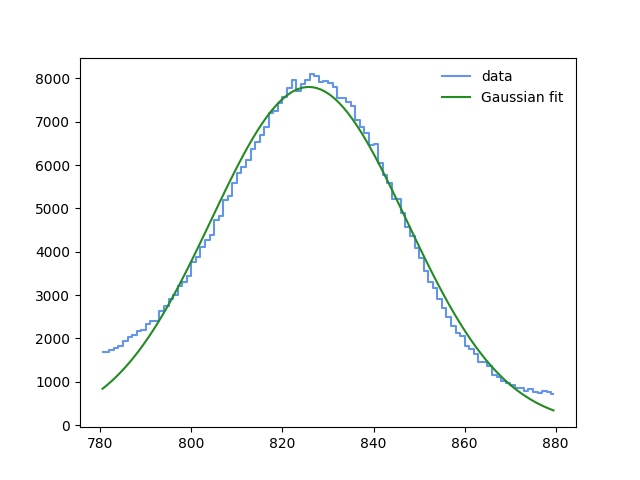

Estimated parameters:
 A = 7804.09903, mu = 825.78617,  sigma = 21.43205 

Uncertainties in the estimated parameters: 
 σ²(A) = 3365.72743, σ²(mu) = 0.03376, σ²(sigma) = 0.03615 

Covariance matrix: 
 [[ 3.36572743e+03  1.23327156e-01 -6.48262195e+00]
 [ 1.23327156e-01  3.37570640e-02 -8.56954157e-04]
 [-6.48262195e+00 -8.56954157e-04  3.61499396e-02]]


In [8]:
peak1 = fittingFunctions.perform_Gaussian_fit(x=data.bin_centers, 
                                              y=data.counts,      
                                              region_start=780,   # bins where to start fitting
                                              region_stop=880,    # bins where to stop fitting
                                              mu_guess=830,       # guess for the position of peak centroid
                                              A_guess=8000,       # guess for the amplitude of the peak
                                              sigma_guess=1)      # guess for the sigma

What you got in the previous cell is `peak1` which is an object of type `Gauss` from the `fittingFunctions` package. It is a convenient way of storing the variables related  to one of your fits (A, mu, sigma, coveriance matrix) together. It improves code readibility and also allows you to keep track of all your variables easier, since for some of the labs you have many peaks, so you can call your varibles more meaningful name. 

In [9]:
# That's how you use peak1 object: 
print("Varibles stored in peak1: A={:.5f}, mu={:.5f} and sigma={:.5f}".format(peak1.A, peak1.mu, peak1.sigma))

Varibles stored in peak1: A=7804.09903, mu=825.78617 and sigma=21.43205


In [10]:
# You can also just print everything stored in peak1 by using following line: 
peak1.print_full_info()

Estimated parameters:
 A = 7804.09903, mu = 825.78617,  sigma = 21.43205 

Uncertainties in the estimated parameters: 
 σ²(A) = 3365.72743, σ²(mu) = 0.03376, σ²(sigma) = 0.03615 

Covariance matrix: 
 [[ 3.36572743e+03  1.23327156e-01 -6.48262195e+00]
 [ 1.23327156e-01  3.37570640e-02 -8.56954157e-04]
 [-6.48262195e+00 -8.56954157e-04  3.61499396e-02]]


You can see that your values of `A`, `sigma` and `mu` come with uncertainty calculated for you by `curve_fit` function and stored in the `covariance_matrix`, where  σ²(A) = `covariance_matrix[0][0]`, σ²(mu) = `covariance_matrix[1][1]` and σ²(sigma) = `covariance_matrix[2][2]`. 

### "Behind the curtains"

*This section is only for the curious! Feel free to skip it :)*

If you want to look a little bit deeper into how to perform fits in Python yourself, the code below will show you what our routines do when you call `perform_gaussian_fit` above. All the heavy lifting is done by SciPy's `curve_fit` which is a powerful and versatile tool. If you use it directly, you can fit any curve to data not just Gaussians. Of course, there are many examples online, this should just help you get started!

<IPython.core.display.Javascript object>


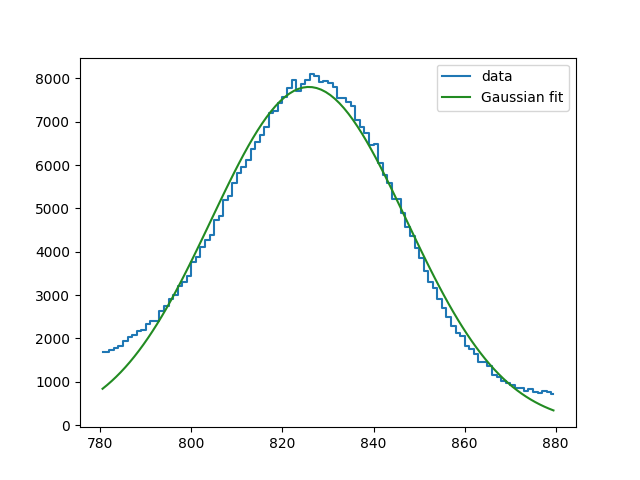

Estimated parameters:
 A = 7804.09903, mu = 825.78617,  sigma = 21.43205 

Uncertainties in the estimated parameters: 
 σ²(A) = 3365.72743, σ²(mu) = 0.03376, σ²(sigma) = 0.03615 

Covariance matrix: 
 [[ 3.36572743e+03  1.23327156e-01 -6.48262195e+00]
 [ 1.23327156e-01  3.37570640e-02 -8.56954157e-04]
 [-6.48262195e+00 -8.56954157e-04  3.61499396e-02]]


In [11]:
##### Preparing out inputs to the algorithm:

### 1. define the data to fit
# define limits to the data (only want to fit peak!)
region_start = 780  # bins where to start fitting
region_stop  = 880  # bins where to stop fitting
# these define a region of interest in our data binning:
region = (region_start < data.bin_centers) & (data.bin_centers < region_stop)
# now limit our data by 'slicing' it, limiting it to the region of interest:
peak_region_bc     = data.bin_centers[region]
peak_region_counts = data.counts[region]


### 2. the function
def GaussFunc(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))


### 3. our initial guesses:
mu_guess = 830                    # a guess for the position of peak centroid
A_guess = 8000                    # a guess for the amplitude of the peak 
sigma_guess = 1
         
guess = [A_guess, mu_guess, sigma_guess] # our initial guess of parameters for a Gaussian fit 

### 4. Now we can perform the fit using curve_fit:

estimates, covar_matrix = curve_fit(GaussFunc,           # name of the function
                                    peak_region_bc,      # your xdata
                                    peak_region_counts,  # your ydata
                                    p0=guess)            # initial guess for the parameters

A, mu, sigma = estimates[0], estimates[1], estimates[2] # unpack results

### Plot your Gaussian fit
plt.figure()
plt.step(peak_region_bc, peak_region_counts, where='mid', label='data')                   # plotting the data 
plt.plot(peak_region_bc, GaussFunc(peak_region_bc, A, mu, sigma), 'forestgreen', label = 'Gaussian fit') # plotting the fit
plt.legend() # adds a legend with all 'label'ed plots!

### Print information about the resulting parameters
print("Estimated parameters:\n A = {:.5f}, mu = {:.5f},  sigma = {:.5f} \n".format(A, mu, sigma))
print("Uncertainties in the estimated parameters: \n \u03C3\u00b2(A) = {:.5f}, \u03C3\u00b2(mu) = {:.5f}, \u03C3\u00b2(sigma) = {:.5f} \n".format(covar_matrix[0][0], covar_matrix[1][1], covar_matrix[2][2]))
print("Covariance matrix: \n {}".format(covar_matrix))


### 3.1.3 Improving your fit - accounting for a linear background  <a name="background"></a>
Maybe you noted that the data we fitted before weren't entirely Gaussian in shape. Even our best fit is put off by that and the results will not be as acurate.

Often in such cases we want to subtract the background from our peak. The peak may, for example, be on the Compton continuum of other peaks higher in energy. Furthermore, this step is needed to be able to correctly determine the intensity of the peak.

As a "first order approach" our strategy will be to assume a *linear* background and to determine its parameters just around the peak we are interested in. We will therefore perform *two* fits: one to the linear background in two regions around the peak as well as a Gaussian fit to the peak *minus* the before derived linear background function. This will noticably improve the quality of the fit. Play with the values and test how stable the result is!

In [16]:
region_start_widget = widgets.IntSlider(value=750, min=1, max=2000, step=1, description=r'region_start')
region_stop_widget = widgets.IntSlider(value=900, min=10, max=2000, step=1, description=r'region_stop')
mu_guess_widget = widgets.IntSlider(value=800, min=1, max=2000, step=1, description=r'mu_guess')
A_guess_widget = widgets.IntSlider(value=1700, min=0, max=data.counts.max(), step=1, description=r'A_guess')
sigma_guess_widget = widgets.IntSlider(value=1, min=1, max=10, step=1, description=r'sigma_guess')
left_selection_widget = widgets.IntRangeSlider(value=[760, 770], min=region_start_widget.value, max=region_stop_widget.value, description=r'left_selection')
right_selection_widget = widgets.IntRangeSlider(value=[870, 880], min=region_start_widget.value, max=region_stop_widget.value, description=r'right_selection')

def interactive_plot_line_fit(region_start, region_stop, mu_guess, A_guess, sigma_guess, left_selection, right_selection):
    fittingFunctions.perform_Gaussian_fit(data.bin_centers, data.counts, region_start, region_stop, mu_guess, A_guess, sigma_guess, left_selection, right_selection)

interactive_plot3 = interactive(interactive_plot_line_fit, {'manual': True, 'manual_name': "Update"}, region_start=region_start_widget, region_stop=region_stop_widget, mu_guess = mu_guess_widget, A_guess = A_guess_widget, sigma_guess = sigma_guess_widget, left_selection=left_selection_widget, right_selection=right_selection_widget)
interactive_plot3

interactive(children=(IntSlider(value=750, description='region_start', max=2000, min=1), IntSlider(value=900, …

### With just one line of code:  <a name="code_background"></a>

To make a Gaussian fit that takes into account the background just use a function `perform_Gaussian_fit` from `fittingFunctions` package with specifying `left_selection` and `right_selection` arrays. *In case you are interested in how the fit was performed you have a look on the function ``perform_Gaussian_fit`` in [fittingFunctions.py](./lib/fittingFunctions.py).*


**You can just copy the following cell and use it in your Jupyter Notebooks with solutions for laboratories.** Be sure to adjust the parameters to your needs.

<IPython.core.display.Javascript object>


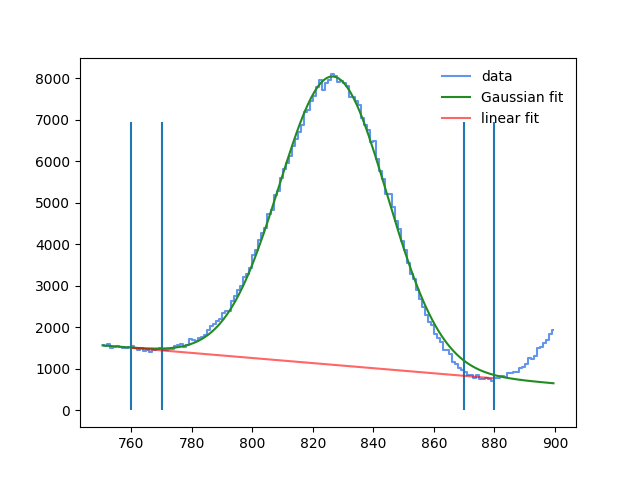

Estimated parameters:
 A = 6946.16686, mu = 826.71431,  sigma = 17.81032 

Uncertainties in the estimated parameters: 
 σ²(A) = 3102.47198, σ²(mu) = 0.02720, σ²(sigma) = 0.02720 

Covariance matrix: 
 [[ 3.10247198e+03  1.97574796e-06 -5.30323602e+00]
 [ 1.97574796e-06  2.71952996e-02 -2.20747341e-10]
 [-5.30323602e+00 -2.20747341e-10  2.71953558e-02]]


In [13]:
gauss = fittingFunctions.perform_Gaussian_fit(x = data.bin_centers, 
                                              y = data.counts,
                                              # region to use
                                              region_start = 750, 
                                              region_stop = 900,
                                              # initial guesses
                                              mu_guess = 800, 
                                              A_guess = 1680, 
                                              sigma_guess = 2,
                                              # regions for linear background fitting/subtraction:
                                              left_selection = [760, 770], 
                                              right_selection = [870, 880])

### "Behind the curtains"

*Again, this section is only for anyone curious about the details!*

As before, we are using `curve_fit` to actually perform the fits. This time, we use it twice: once for the linear fit to the background, then for the Gaussian fit to the data minus the background.

In [ ]:
# define limits to the data (only want to fit peak!)
region_start = 750  # bins where to start fitting
region_stop  = 900  # bins where to stop fitting
# these define a region of interest in our data binning:
region = (region_start < data.bin_centers) & (data.bin_centers < region_stop)
# now limit our data by 'slicing' it, limiting it to the region of interest:
peak_region_bc     = data.bin_centers[region]
peak_region_counts = data.counts[region]
# let's select channels on both sides of our fit to which we want to fit our line: 
left_selection = [760, 770]
right_selection = [870, 880]

############ Selecting points to fit linear function
# select a region with logic statement:
lin_region = ((data.bin_centers>left_selection[0]) & (data.bin_centers<left_selection[1])) | ((data.bin_centers>right_selection[0]) & (data.bin_centers<right_selection[1]))
lin_bc = data.bin_centers[lin_region]
lin_counts = data.counts[lin_region]


############ Fitting linear function to selected points

guess = [2, 1]

estimates_lin, covar_matrix = curve_fit(fittingFunctions.LineFunc,
                                    lin_bc,
                                    lin_counts,
                                    p0 = guess)


############ Subtracting the linear background

line = LineFunc(peak_region_bc, estimates_lin[0], estimates_lin[1])
peak_region_counts_subs = peak_region_counts - line

############ Fit the Gaussian to the peak without backround

guess = [A_guess, mu_guess, sigma_guess]

estimates, covar_matrix = curve_fit(fittingFunctions.GaussFunc,
                                    peak_region_bc,
                                    peak_region_counts_subs,
                                    p0=guess)
A, mu, sigma = estimates[0], estimates[1], estimates[2] # unpack results

peak1 = fittingFunctions.Gauss(estimates[0], estimates[1], estimates[2], covar_matrix)

############ Plotting results 
# TODO : this is quite a wall of values -- can this be simplified?
plt.figure()
plt.step(peak_region_bc, peak_region_counts, where='mid', color='cornflowerblue', label='data') #plotting data
plt.vlines(left_selection+right_selection, ymin=0, ymax=peak1.A)  #plot support lines around selected points 
plt.plot(peak_region_bc, line + GaussFunc(peak_region_bc, peak1.A, peak1.mu, peak1.sigma), color='forestgreen', label = 'Gaussian fit')  # plot Gaussian 
plt.plot(lin_bc, LineFunc(lin_bc, estimates_lin[0], estimates_lin[1]), color='r', label = 'linear fit', alpha=0.6)  # plot linear fit

########### Printing results
print("Linear fit estimates (k m) = (", estimates_lin[0], estimates_lin[1], ")\n")
print("Estimates of (A mu sigma) = (", peak1.A, peak1.mu, peak1.sigma, ")\n")
print("Covariance matrix = \n", peak1.covar_matrix, "\n")
print("Uncertainties in the estimated parameters: \n[ sigma^2(A) sigma^2(mu), sigma^2(sigma) ] = \n[", peak1.covar_matrix[0][0], peak1.covar_matrix[1][1], peak1.covar_matrix[2][2], "]" )


### Practice time 

Now, since we know how to fit a peak, lets practice with the second peak on our test spectrum. Adjust the parameters to improve the current state of the fit:

<IPython.core.display.Javascript object>


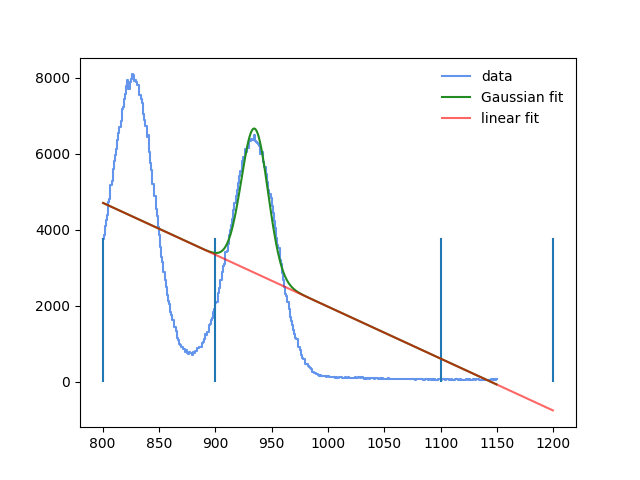

Estimated parameters:
 A = 3797.81449, mu = 934.98640,  sigma = 11.77088 

Uncertainties in the estimated parameters: 
 σ²(A) = 171153.54883, σ²(mu) = 2.19368, σ²(sigma) = 2.19368 

Covariance matrix: 
 [[ 1.71153549e+05  4.18256870e-04 -3.53768101e+02]
 [ 4.18256870e-04  2.19367703e+00 -1.29748027e-06]
 [-3.53768101e+02 -1.29748027e-06  2.19367705e+00]]


In [14]:
#Let's select channels on both sides of our fit to which we want to fit our line: 
left_selection = [800, 900]
right_selection = [1100, 1200]

#And usual parameters:
region_start = 800 # bins where to start fitting
region_stop = 1150  # bins where to stop fitting

mu_guess = 900 # a guess for the position of peak centroid
A_guess = 2000  # a guess for the amplitude of the peak 
sigma_guess = 10 # a guess for the sigma

peak2 = fittingFunctions.perform_Gaussian_fit(data.bin_centers, data.counts, region_start, region_stop, mu_guess, A_guess, sigma_guess, left_selection, right_selection)

## 3.2 Compute a peak area - Intensity calculations <a name="peak_area"></a>

In gamma spectroscopy the area of the peak is determined by the intensity of the gamma ray and the efficiency of the detector. There are different ways of how to calculate the area of a peak in a spectrum. The by far easiest method is to calculate the area of the fitted Gaussian function (see [https://en.wikipedia.org/wiki/Gaussian_function](https://en.wikipedia.org/wiki/Gaussian_function)). Now that we actually have our Gaussian parameters we can use them for the intensity calculations. 

In [ ]:
Area = np.sqrt(2*np.pi)*peak2.A*np.abs(peak2.sigma)
print('Area of the second peak is {:.2f}'.format(Area))

## 3.3 Fit a line - Energy calibration <a name="line"></a>

In spectroscopy experiments it is often essential to calibrate the detector response with respect to a known energies emitted from a so called calibration source. The relationship between the detector response and the energy is mostly assumed linear. The code below exemplifies how to estimate the linear calibration for 'random data'.

### 3.3.1 Find calibration coefficients <a name="coeff"></a>

To perform an energy calibration we need to "match" energies of the peaks to the peaks centroids we caculated with our Gaussian fits. 

Our spectrum is actually **Co-60** source which emits gammas with **energies** of 1173.228 keV and 1332.492 keV :

In [ ]:
# we define them as Numpy arrays, as these are easier to use in calculations than lists:
energy = np.array([1173.228, 1332.492])

We fitted two of our peaks, so we know their peak centroids: 

In [ ]:
channels = np.array([peak1.mu, peak2.mu])

In [ ]:
### 1. define the data to fit
# see energy and channels in the cells above

### 2. the function
def LineFunc(x, k, m):
    return k*x+m

### 3. our intial guess 
guess = [2, # k
         1] # m

### 4. now we can perform the fit using curve_fit:
estimates, covar_matrix = curve_fit(LineFunc,
                                    channels,
                                    energy,
                                    p0 = guess)

k = estimates[0] # unpack our values 
m = estimates[1] # unpack our values 

print("Estimates of k = {:.2f} and  m = {:.2f}".format(k, m))

### Plot your Gaussian fit
plt.figure()
plt.plot(channels, energy, linestyle="", marker="*", label='data points')
plt.plot(channels, LineFunc(channels, k, m), label='linear fit')
plt.legend(loc='upper left')
plt.title("Energy calibration") # set title of the plot
plt.xlabel("Channels")     # set label for x-axis 
plt.ylabel("Energy")       # set label for y-axis 
plt.show()

*Note*: You might see a warning from the fit: this is due to the low number of data points we use in this "fit".

### Apply calibration <a name="application"></a>

You can apply an energy calibration to you data in the next way:

In [ ]:
data.calibrate(k, m) ### which means data.energy = data.bin_centers * k + m 

In [ ]:
plt.figure()
# with the data read in with the first routine
plt.step(data.energy, data.counts, where='mid', label='Calibrated data')

plt.title("Calibrated Co-60 spectrum") # set title of the plot
plt.xlabel("Energy, keV")     # set label for x-axis 
plt.ylabel("Counts")          # set label for y-axis 
plt.legend()                  # enables legend for all plots with a 'label'
#plt.savefig("test_spectrum.png") # This is how you save the figure. Change the extension for different file types such as pdf or png.

# 4. Take away <a name="away"></a>

The aim of this notebook is to be **a usefull tool** for you to use during your labs. 

Remember, the goal is not to teach you programming, but rather to introduce you to it and show how Python as one of many programming languages could make lives of physicists easier. And as a physicist, it is always good to have many tools available in your toolbelt!

This time, we did all the programming for you and prepared Jupyter Notebooks for each lab, so that you have more time to focus on the physics :) 